In [1]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from linearmodels import PooledOLS

In [15]:
sin_portfolio_df = pd.read_csv("portfolio_returns_divi_rfr.csv")

other_factors_df = pd.read_csv("final_merged.csv")

# Converting data types for merging

In [16]:
sin_portfolio_df

,Unnamed: 0,Num_Active_Stocks,BEER,GRRR,THT,IBCO,BORN,TFZ,CNWN,CDB,...,DEO,RUM,VCO,ADSO,NDC,GWT,CEDC,Portfolio_Returns,Portfolio_Proportion,rf
0,1962-08-31,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027044,0.050000,0.0023
1,1962-09-30,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.053537,0.052632,0.0021
2,1962-10-31,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.049831,0.052632,0.0025
3,1962-11-30,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.085726,0.058824,0.0020
4,1962-12-31,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.017382,0.055556,0.0023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,2020-08-31,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.006564,NaN,NaN,NaN,NaN,NaN,NaN,-0.016921,0.090909,0.0001
697,2020-09-30,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002205,NaN,NaN,NaN,NaN,NaN,NaN,0.120605,0.090909,0.0001
698,2020-10-31,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.005434,NaN,NaN,NaN,NaN,NaN,NaN,-0.030375,0.100000,0.0001
699,2020-11-30,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.019028,NaN,NaN,NaN,NaN,NaN,NaN,0.246320,0.100000,0.0001


In [19]:
sin_portfolio_df.rename(columns = {"Unnamed: 0": "Date"}, inplace=True)
sin_portfolio_df["Date"] = pd.to_datetime(sin_portfolio_df["Date"])
sin_portfolio_df.set_index("Date", inplace=True)
sin_portfolio_df.head()

,Num_Active_Stocks,BEER,GRRR,THT,IBCO,BORN,TFZ,CNWN,CDB,TBVT,...,DEO,RUM,VCO,ADSO,NDC,GWT,CEDC,Portfolio_Returns,Portfolio_Proportion,rf
Date,,,,,,,,,,,,,,,,,,,,,
1962-08-31,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027044,0.050000,0.0023
1962-09-30,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.053537,0.052632,0.0021
1962-10-31,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.049831,0.052632,0.0025
1962-11-30,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.085726,0.058824,0.0020
1962-12-31,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.017382,0.055556,0.0023


In [20]:
other_factors_df.rename(columns = {"Unnamed: 0": "Date", "Excess Return on the Market": "ExRm"}, inplace = True)
other_factors_df["Date"] = pd.to_datetime(other_factors_df["Date"])
other_factors_df.set_index("Date", inplace=True)
other_factors_df.head()

,ABEV,ABUD,ABV,ABW,ACCOB,ADC,ADSO,AED,AFTI,BACA,...,VO,FARM,GMCR,JVA,PEET,ExRm,SMB,HML,MOM,USREC
Date,,,,,,,,,,,,,,,,,,,,,
1962-07-31,NaN,NaN,NaN,NaN,NaN,37.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0628,0.0163,-0.0357,0.0055,0
1962-08-31,NaN,NaN,NaN,NaN,NaN,37.250,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0213,0.0125,-0.0121,-0.0058,0
1962-09-30,NaN,NaN,NaN,NaN,NaN,37.250,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.0522,-0.0248,0.0134,0.0395,0
1962-10-31,NaN,NaN,NaN,NaN,NaN,33.375,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.0005,-0.0401,0.0135,0.0075,0
1962-11-30,NaN,NaN,NaN,2.5,NaN,39.625,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.1087,0.0259,0.0099,-0.0717,0


# Filtering required columns only

In [21]:
sin_portfolio_df = sin_portfolio_df[["Portfolio_Returns"]]
other_factors_df = other_factors_df[["ExRm", "SMB", "HML", "MOM", "USREC"]]


# Merging for model building

## Checking shapes before merging

In [22]:
sin_portfolio_df.shape, other_factors_df.shape

((701, 1), (702, 5))

In [23]:
model_df = pd.concat([sin_portfolio_df, other_factors_df], axis = 1, join = "inner")

model_df.rename(columns = {"Portfolio_Returns": "Portfolio_Excess_Return"}, inplace=True)
model_df

,Portfolio_Excess_Return,ExRm,SMB,HML,MOM,USREC
Date,,,,,,
1962-08-31,0.027044,0.0213,0.0125,-0.0121,-0.0058,0
1962-09-30,-0.053537,-0.0522,-0.0248,0.0134,0.0395,0
1962-10-31,-0.049831,-0.0005,-0.0401,0.0135,0.0075,0
1962-11-30,0.085726,0.1087,0.0259,0.0099,-0.0717,0
1962-12-31,-0.017382,0.0101,-0.0380,0.0035,0.0588,0
...,...,...,...,...,...,...
2020-08-31,-0.016921,0.0763,-0.0022,-0.0293,0.0051,0
2020-09-30,0.120605,-0.0363,-0.0004,-0.0266,0.0305,0
2020-10-31,-0.030375,-0.0210,0.0439,0.0419,-0.0303,0


# Exploratory Data Analysis

<AxesSubplot:title={'center':'Portfolio Excess Returns with US Recession Indicator'}, xlabel='Date'>

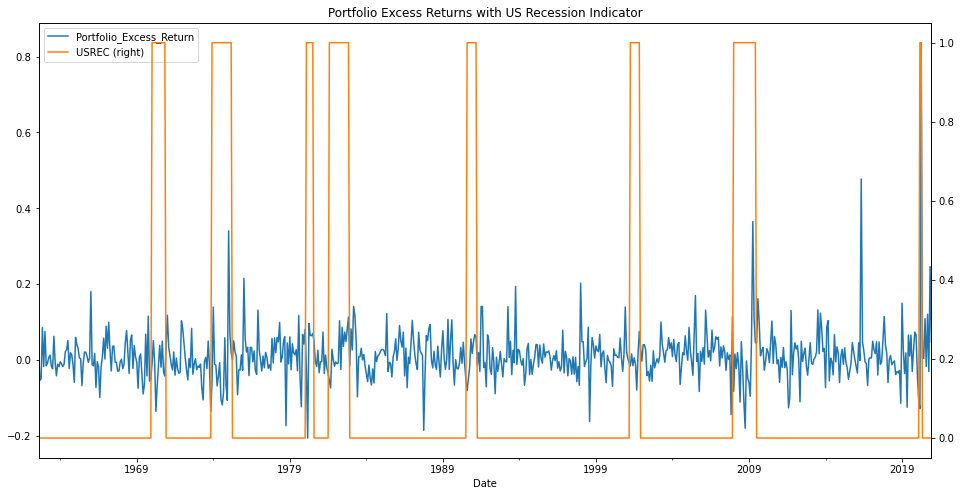

In [40]:
model_df[["Portfolio_Excess_Return", "USREC"]].plot(secondary_y = ["USREC"], figsize = (16,8), title = "Portfolio Excess Returns with US Recession Indicator")

In [28]:
model_df.describe()["Portfolio_Excess_Return"]

count    701.000000
mean       0.010804
std        0.067397
min       -0.205746
25%       -0.020041
50%        0.004987
75%        0.037038
max        0.836589
Name: Portfolio_Excess_Return, dtype: float64

# Model Building
https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series

In [29]:
model_df2 = model_df.copy()

# model_df2["Time_Dummy"] = np.arange(len(model_df.index))
model_df2

,Portfolio_Excess_Return,ExRm,SMB,HML,MOM,USREC
Date,,,,,,
1962-08-31,0.027044,0.0213,0.0125,-0.0121,-0.0058,0
1962-09-30,-0.053537,-0.0522,-0.0248,0.0134,0.0395,0
1962-10-31,-0.049831,-0.0005,-0.0401,0.0135,0.0075,0
1962-11-30,0.085726,0.1087,0.0259,0.0099,-0.0717,0
1962-12-31,-0.017382,0.0101,-0.0380,0.0035,0.0588,0
...,...,...,...,...,...,...
2020-08-31,-0.016921,0.0763,-0.0022,-0.0293,0.0051,0
2020-09-30,0.120605,-0.0363,-0.0004,-0.0266,0.0305,0
2020-10-31,-0.030375,-0.0210,0.0439,0.0419,-0.0303,0


In [38]:
X = model_df2[["ExRm", "SMB", "HML", "MOM"]]
y = model_df2["Portfolio_Excess_Return"]

X = sm.add_constant(X)

model = sm.OLS(y, X)
result = model.fit()

result.summary()

with open("formula1.csv", "w") as f:
    f.write(result.summary().as_csv())

In [39]:
import statsmodels.formula.api as smf
formula_3 = "Portfolio_Excess_Return ~ ExRm + SMB + HML + MOM + USREC + USREC * ExRm + USREC * SMB + USREC * HML + USREC * MOM"

interaction_model = smf.ols(formula = formula_3, data = model_df2)
result2 = interaction_model.fit()
result2.summary()

with open("formula3.csv", "w") as f:
    f.write(result2.summary().as_csv())